In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('../framingham/framingham.csv')

In [4]:
train.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [14]:
train[['BMI','glucose']].head()

,BMI,glucose
0,26.97,77.0
1,28.73,76.0
2,25.34,70.0
3,28.58,103.0
4,23.10,85.0


<Axes: xlabel='BMI', ylabel='glucose'>

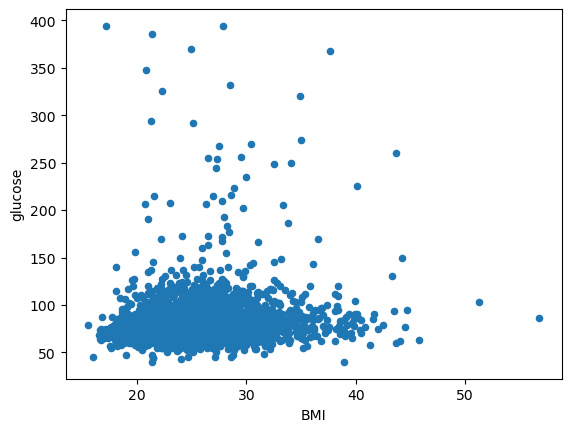

In [15]:
train[['BMI','glucose']].plot.scatter(x='BMI',y='glucose')

In [34]:
w = 2.2
b = 4.6

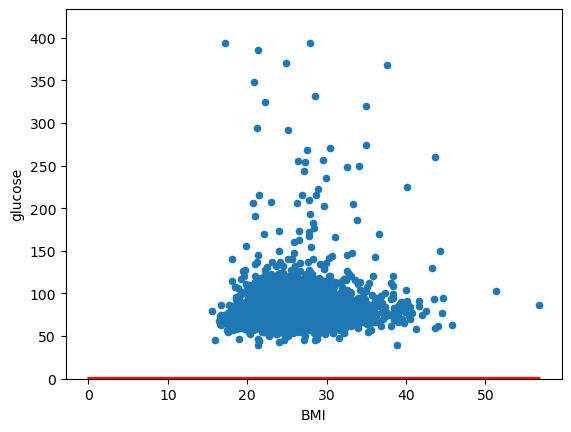

In [35]:
# puntos de la recta
x = np.linspace(0,train['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='BMI',y='glucose')
plt.plot(x, y, '-r')
plt.ylim(0,train['glucose'].max()*1.1)
# plt.grid()
plt.show()

In [17]:
train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['glucose']*np.log(train['sigmoid'])-(1-train['glucose'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

104.13570034925566

In [18]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [19]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [20]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*df['w']+df['b'])))
    train['loss_xi'] = -train['glucose']*np.log(train['sigmoid'])-(1-train['glucose'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [22]:
df['error'] = df.apply(sum_error_df, axis=1)

In [23]:
df.sort_values(by=['error']).head()

,w,b,error
999,0.14,-3.01,-49.551391
998,0.14,-3.02,-48.738383
997,0.14,-3.03,-47.925353
996,0.14,-3.04,-47.112301
995,0.14,-3.05,-46.299226


In [24]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [25]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,221.646272,220.827557,220.008848,219.190144,218.371447,217.552756,216.734072,215.915393,215.096721,214.278055,...,147.992979,147.175056,146.357146,145.539249,144.721363,143.903491,143.085630,142.267783,141.449948,140.632126
0.06,200.433369,199.614831,198.796302,197.977780,197.159265,196.340758,195.522259,194.703768,193.885284,193.066809,...,126.803293,125.985724,125.168168,124.350628,123.533102,122.715591,121.898095,121.080614,120.263148,119.445698
0.07,179.225920,178.407605,177.589299,176.771003,175.952716,175.134438,174.316171,173.497912,172.679664,171.861425,...,105.623983,104.806828,103.989690,103.172569,102.355465,101.538378,100.721309,99.904257,99.087223,98.270206
0.08,158.025246,157.207204,156.389174,155.571155,154.753147,153.935151,153.117166,152.299193,151.481232,150.663283,...,84.456709,83.640030,82.823370,82.006729,81.190108,80.373506,79.556924,78.740361,77.923818,77.107295
0.09,136.832826,136.015114,135.197415,134.379730,133.562058,132.744400,131.926756,131.109126,130.291509,129.473907,...,63.302999,62.486850,61.670722,60.854616,60.038530,59.222466,58.406424,57.590403,56.774403,55.958426


In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

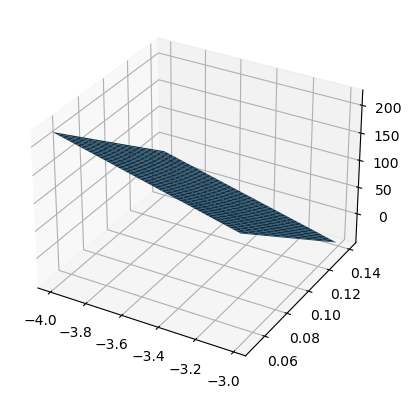

In [28]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

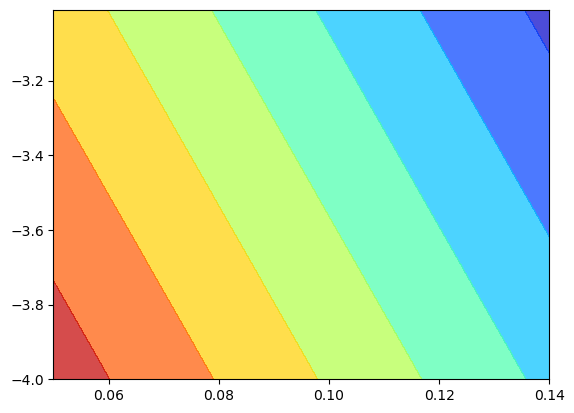

In [29]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [30]:
def delta_j_w(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['glucose'])*train['BMI']
    derivative = train['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['glucose'])
    derivative = train['partial_loss'].mean()
    return(derivative) 

In [31]:
w_0 = 0.09
b_0 = -3.57

In [32]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

2.207028260193528 4.600623483296136
